In [2]:
from sklearn.datasets import load_iris
%matplotlib inline
import matplotlib.pyplot as plt

In [14]:
iris = load_iris()
# print(iris)
iris_df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
iris_df["target"] = iris["target"]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
# Get x, y
x = iris_df.drop("target", axis=1)
y = iris_df["target"]

In [20]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [27]:
# Post Prunning

# Fit the model and check accuracy
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Fit the model
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(x_train, y_train)

# Accuracy
y_pred = clf.predict(x_test)
accuracy_score(y_pred, y_test)

0.98

# I have created decision tree first and then after prediction done changes in DecisionTreeClassifier() class because of post prunning.

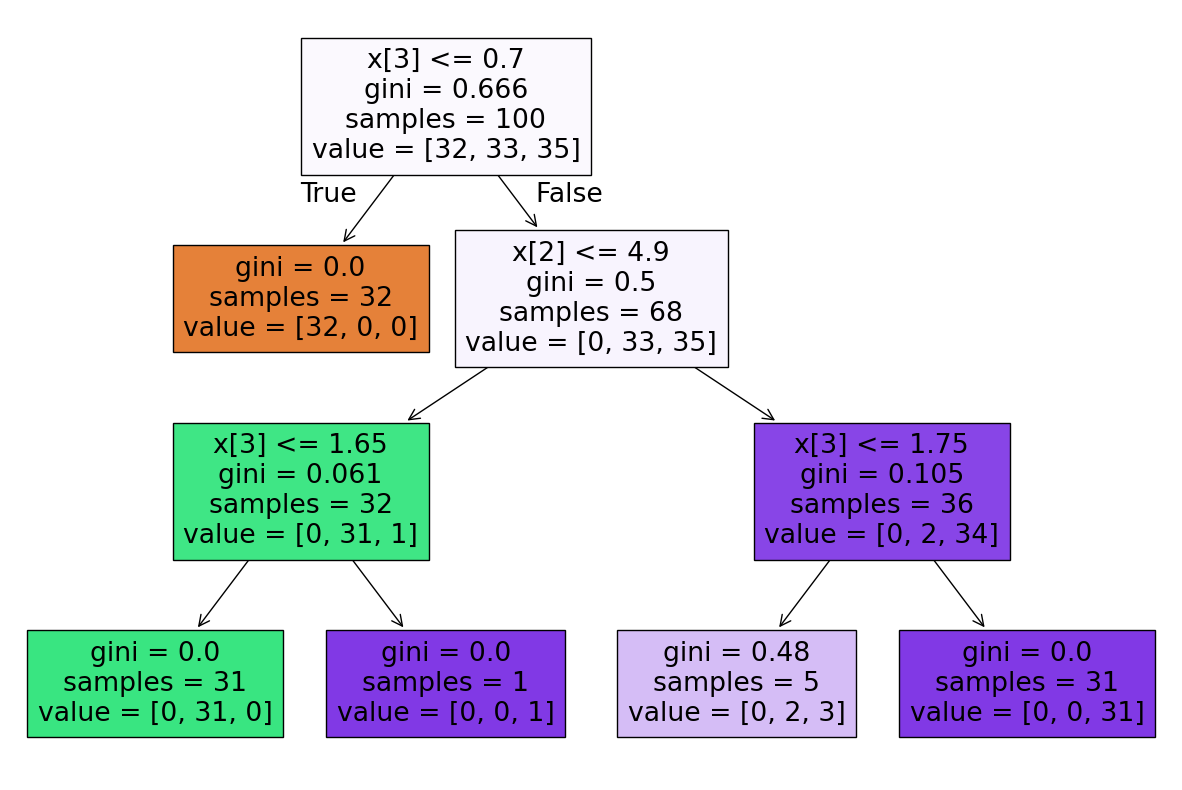

In [28]:
from sklearn import tree
plt.figure(figsize=(15, 10))
tree.plot_tree(clf, filled=True)
plt.show()

In [29]:
# Pre prunning

parameters = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter':['best', 'random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto', 'sqrt', 'log2']
}

In [30]:

# Fit the model and check accuracy
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

from sklearn.model_selection import GridSearchCV

# Fit the model
clf = DecisionTreeClassifier()
cv = GridSearchCV(clf, param_grid=parameters, cv=5, scoring="accuracy")


clf.fit(x_train, y_train)

# Accuracy
y_pred = clf.predict(x_test)
accuracy_score(y_pred, y_test)

0.96